In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
train_data='cifar-10-img/train'
test_data='cifar-10-img/test'
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator=ImageDataGenerator(rescale=1.0/255)
test_data_generator=ImageDataGenerator(rescale=1.0/255)


train_generator=train_data_generator.flow_from_directory(
    train_data,target_size=(32,32),batch_size=5000,class_mode='categorical'
)

test_generator=test_data_generator.flow_from_directory(
    test_data,target_size=(32,32),batch_size=1000,class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [10]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [15]:
from tensorflow.keras.applications import VGG16
weight_path="vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weight_path, include_top=False, input_shape=(32, 32, 3))

In [19]:
for i in base_model.layers:
    i.trainable=False

In [20]:
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,batch_size=30,epochs=2,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/2
167/167 [==============================] - 15s 81ms/step - loss: 1.8900 - accuracy: 0.3200 - val_loss: 1.5030 - val_accuracy: 0.4690
Epoch 2/2
167/167 [==============================] - 20s 120ms/step - loss: 1.5313 - accuracy: 0.4646 - val_loss: 1.3986 - val_accuracy: 0.5080


In [40]:
from tensorflow.keras.optimizers import Adam
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
   layer.trainable = False

for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True

x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)


model = keras.models.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
79/79 [==============================] - 44s 539ms/step - loss: 2.0002 - accuracy: 0.2426 - val_loss: 1.7801 - val_accuracy: 0.3790
Epoch 2/2
79/79 [==============================] - 49s 620ms/step - loss: 1.4387 - accuracy: 0.4722 - val_loss: 1.3166 - val_accuracy: 0.5120


In [41]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 [==============================] - 2s 72ms/step


Preditcted:  airplane
Actual:  airplane


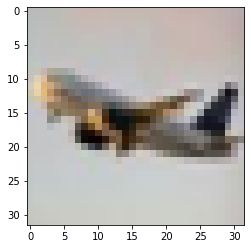

In [43]:
labels = list(test_generator.class_indices.keys())
n = 10
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])